In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
seaborn.set_style("darkgrid")

In [44]:
baserun_df=pd.read_csv("ddpg_random_sample_baserun.csv")
random_choice_df = pd.read_csv("ddpg_per_version_random.csv")
maxsteps500_df = pd.read_csv("ddpg_baserun_500stepsmax.csv")
random_nonoise_df = pd.read_csv("ddpg_baseversion_withoutnoise_random.csv")
ddpg_random_nonoise_df =  pd.read_csv("ddpg_per_False_20210331_155213.csv")
ddpg_per_nonoise_df = pd.read_csv("ddpg_per_True_20210331_175855.csv")
ddpg_per_gaussian_df = pd.read_csv("ddpg_per_TRUE_gaussian_20210404_180743.csv")

<AxesSubplot:>

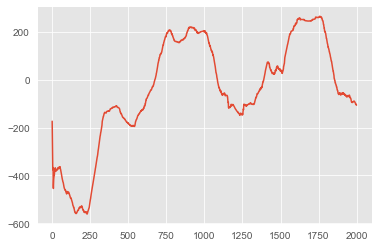

In [45]:
ddpg_per_gaussian_df["avg_reward"].plot()

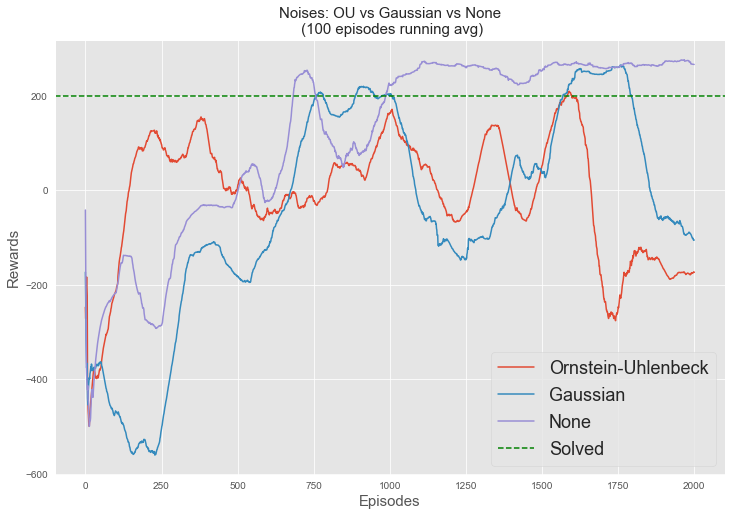

In [55]:
plt.figure(figsize= (12,8))
plt.title("Noises: OU vs Gaussian vs None\n (100 episodes running avg)",fontsize=15)
plt.style.use("ggplot")
plt.plot(random_choice_df["avg_reward"],label="Ornstein-Uhlenbeck")
plt.plot(ddpg_per_gaussian_df["avg_reward"],label="Gaussian")
plt.plot(ddpg_per_nonoise_df["avg_reward"],label="None")
plt.axhline(y=200,color='g',linestyle="--",label="Solved")
plt.xlabel('Episodes', fontsize=15)
plt.ylabel('Rewards', fontsize=15)
plt.legend(loc="lower right", prop={"size":18})
plt.savefig("noises.png",dpi=400)
plt.show()

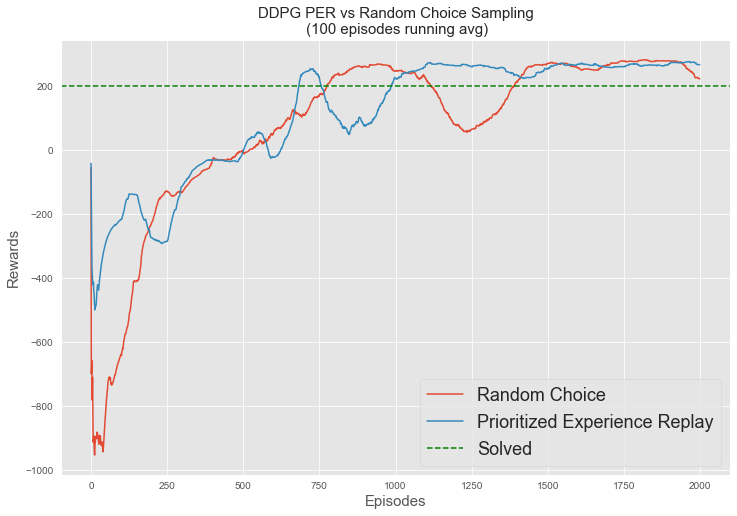

In [54]:
plt.figure(figsize= (12,8))
plt.title("DDPG PER vs Random Choice Sampling\n (100 episodes running avg)",fontsize=15)
plt.style.use("ggplot")
plt.plot(ddpg_random_nonoise_df["avg_reward"],label="Random Choice")
plt.plot(ddpg_per_nonoise_df["avg_reward"],label="Prioritized Experience Replay")
plt.axhline(y=200,color='g',linestyle="--",label="Solved")
plt.xlabel('Episodes', fontsize=15)
plt.ylabel('Rewards', fontsize=15)
plt.legend(loc="lower right", prop={"size":18})
plt.savefig("per_vs_random.png",dpi=400)
plt.show()

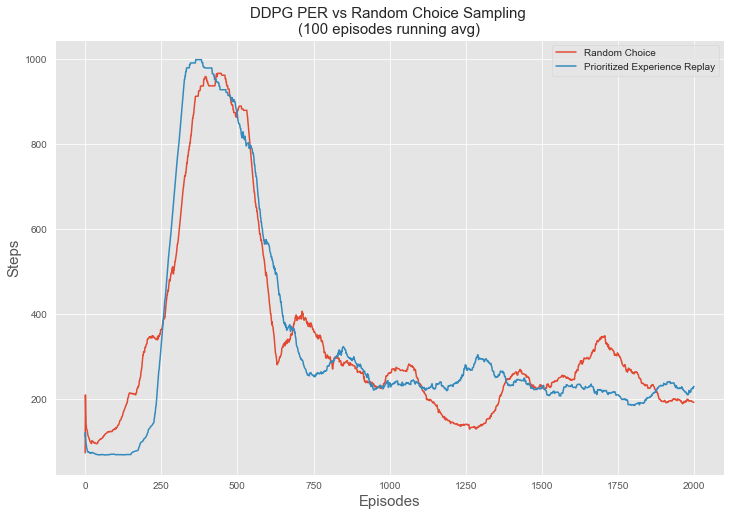

In [35]:
plt.figure(figsize= (12,8))
plt.title("DDPG PER vs Random Choice Sampling \n(100 episodes running avg)",fontsize=15)
plt.style.use("ggplot")
plt.plot(ddpg_random_nonoise_df["avg_steps"],label="Random Choice")
plt.plot(ddpg_per_nonoise_df["avg_steps"],label="Prioritized Experience Replay")
plt.xlabel('Episodes', fontsize=15)
plt.ylabel('Steps', fontsize=15)
#plt.axhline(y=200,color='g',linestyle="--",label="Solved")
plt.legend(loc="upper right")
plt.savefig("per_vs_random_steps.png",dpi=400)
plt.show()

In [38]:
ddpg_random_nonoise_df.steps.sum()/ddpg_per_nonoise_df.steps.sum()

0.9989781970954141

In [27]:
ddpg_random_nonoise_df["avg_steps"]=ddpg_random_nonoise_df.rolling(window=100,min_periods=1)["steps"].mean()

In [29]:
ddpg_per_nonoise_df["avg_steps"]=ddpg_per_nonoise_df.rolling(window=100,min_periods=1)["steps"].mean()

In [43]:
ddpg_random_nonoise_df.steps[:1500].sum()/ddpg_per_nonoise_df.steps[:1500].sum()

0.9736962613930709

In [42]:
ddpg_per_nonoise_df.steps[:1500].sum()

565585